# Kings County Housing Prices Bakeoff

In this notebook I am exploring feature engineering and modeling to predict housing prices around Seattle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)

## Step 1: Read in Data

In [2]:
data = pd.read_csv('../kc_house_data_train.csv')
data.drop(columns='Unnamed: 0', inplace=True)

In [3]:
print(data.shape)
print(data.columns)
data.head()

(17290, 21)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028
17289,6703100135,20150116T000000,348000.0,3,1.50,1330,6768,1.0,0,0,4,7,1330,0,1952,0,98155,47.7366,-122.319,1320,6910


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 21 columns):
id               17290 non-null int64
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.8+ MB


In [6]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [8]:
# Maybe put this correlation heatmap after the continuous variable scatterplots
# plt.figure(figsize=(16, 6))
# heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Numerical Features and Years

In [9]:
data['yr_sold'] = data['date'].apply(lambda x: int(x[:4]))
data['yr_since_reno'] = data['yr_sold'] - data['yr_renovated']

In [10]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  22


In [11]:
year_feature = [feature for feature in numerical_features if 'yr' in feature]
year_feature

['yr_built', 'yr_renovated', 'yr_sold', 'yr_since_reno']

In [12]:
for feature in year_feature:
    print(feature, data[feature].unique())

yr_built [1986 1977 1997 1990 2004 1970 1987 2005 1909 1930 1963 1968 2003 1910
 2001 1954 1993 1969 1976 2007 1983 1955 1981 1972 1904 1942 1973 1918
 1961 1962 2000 2013 2014 2009 1953 1960 1994 1900 1999 1949 1980 1944
 1921 1998 1925 1950 1985 1974 1926 1967 1975 1912 1966 2006 1991 1959
 1984 1979 1964 1920 1957 1995 1951 1982 1988 1914 1917 1908 1947 1971
 2015 1937 1958 2002 1956 1938 1948 2008 2010 1936 1907 2012 1978 1941
 1965 1992 1927 1929 1903 1928 1915 1923 1946 1911 1996 1952 1940 1916
 1945 1943 1989 1913 1906 1924 1931 1922 1932 1901 1905 2011 1939 1919
 1933 1935 1902 1934]
yr_renovated [   0 1998 1983 1989 1985 2002 1999 2010 2015 1990 1972 2013 1955 2001
 2000 2011 1956 2006 1965 1987 2007 1995 2014 1945 1993 1992 1979 1980
 1946 1988 1958 1996 2004 1973 2005 1994 2003 1986 1981 1953 2012 1991
 1975 1977 1978 1968 2009 1984 2008 1967 1997 1974 1982 1963 1969 1940
 1970 1971 1957 1976 1960 1962 1944 1959 1964 1950 1934 1951 1948]
yr_sold [2014 2015]
yr_since_reno [20

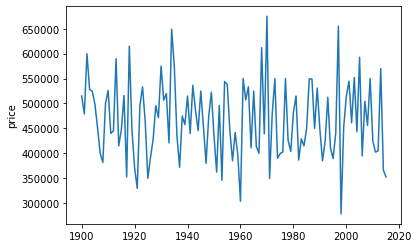

In [13]:
x = data['yr_built'].unique()
y = data.groupby('yr_built')['price'].median()
lineplot = sns.lineplot(x=x, y=y)
lineplot 

Text(0.5, 1.0, 'House Price vs. Year Built')

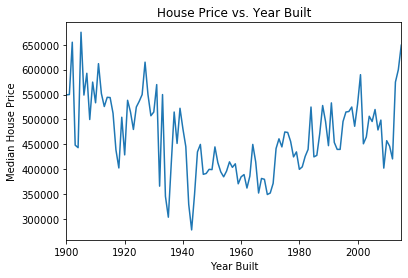

In [14]:
data.groupby('yr_built')['price'].median().plot()
plt.xlabel('Year Built')
plt.ylabel('Median House Price')
plt.title('House Price vs. Year Built')

(1930, 2015.0)

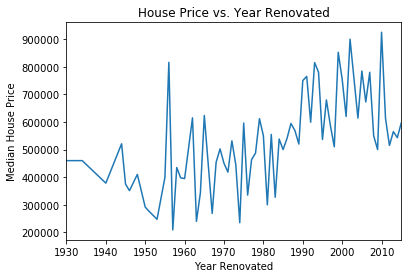

In [15]:
data.groupby('yr_renovated')['price'].median().plot()
plt.xlabel('Year Renovated')
plt.ylabel('Median House Price')
plt.title('House Price vs. Year Renovated')
plt.xlim(left=1930)

(-1.0, 80)

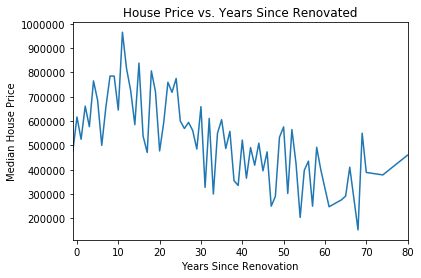

In [16]:
data.groupby('yr_since_reno')['price'].median().plot()
plt.xlabel('Years Since Renovation')
plt.ylabel('Median House Price')
plt.title('House Price vs. Years Since Renovated')
plt.xlim(right=80)

### Discrete Features

In [17]:
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10), sharey=True)

# categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

# for col, ax in zip(categoricals, axes.flatten()):
#     (ames.groupby(col)               # group values together by column of interest
#          .mean()['SalePrice']        # take the mean of the saleprice for each group
#          .sort_values()              # sort the groups in ascending order
#          .plot
#          .bar(ax=ax))                # create a bar graph on the ax
    
#     ax.set_title(col)                # Make the title the name of the column
    
# fig.tight_layout()

In [18]:
# less than 31 because there are 30 unique bathroom values, but also need to include zipcodes?
discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<31 and feature not in year_feature+['id']]
discrete_feature.append('zipcode')
print('Discrete Variables Count: {}'.format(len(discrete_feature)))
print(discrete_feature)

Discrete Variables Count: 8
['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']


Text(0.5, 1.0, 'View')

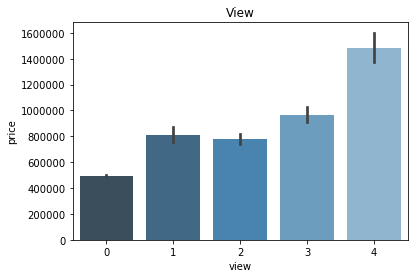

In [19]:
sns.barplot(x='view', y='price', data=data, palette='Blues_d').set_title('View')


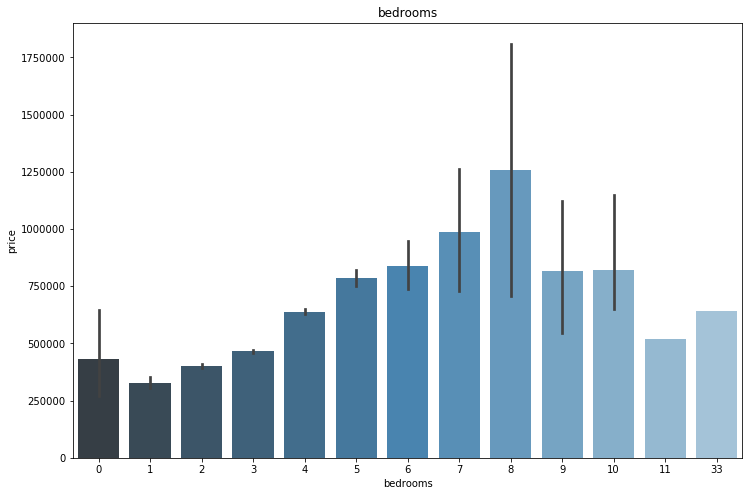

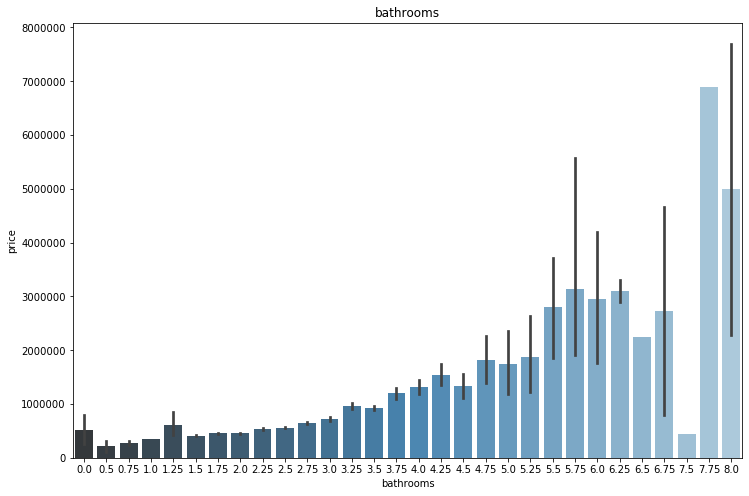

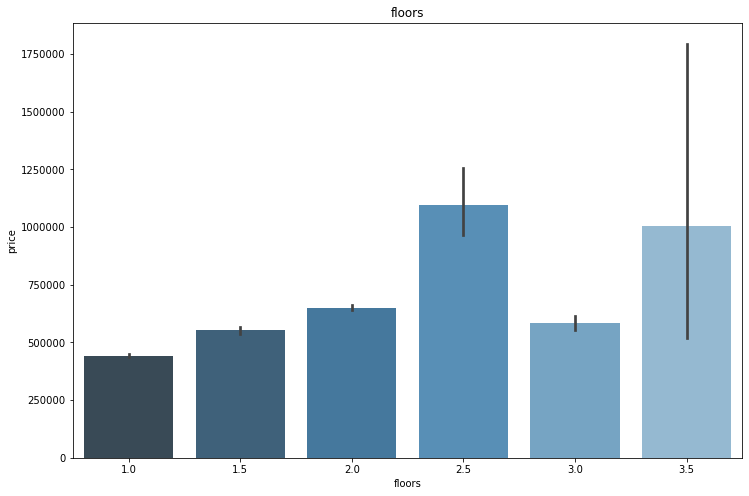

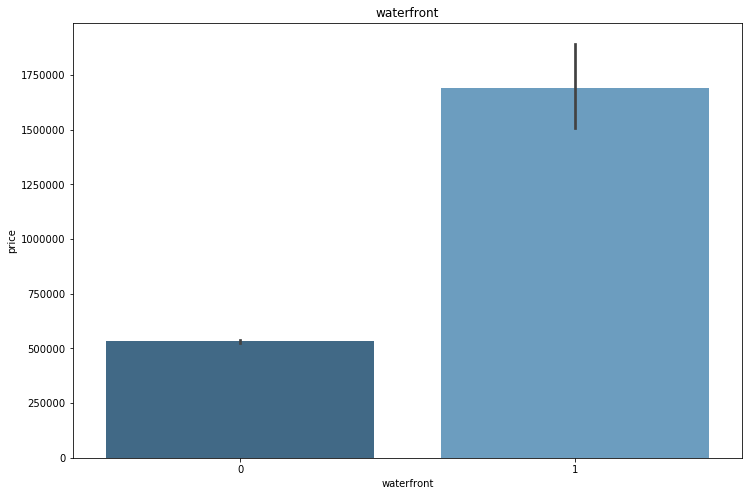

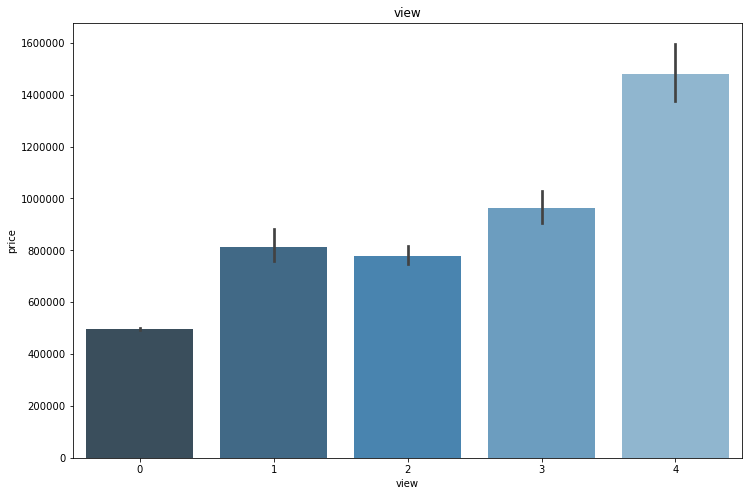

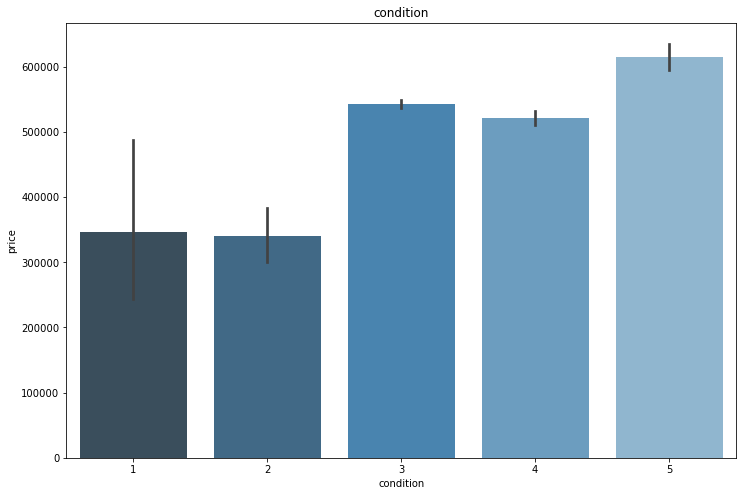

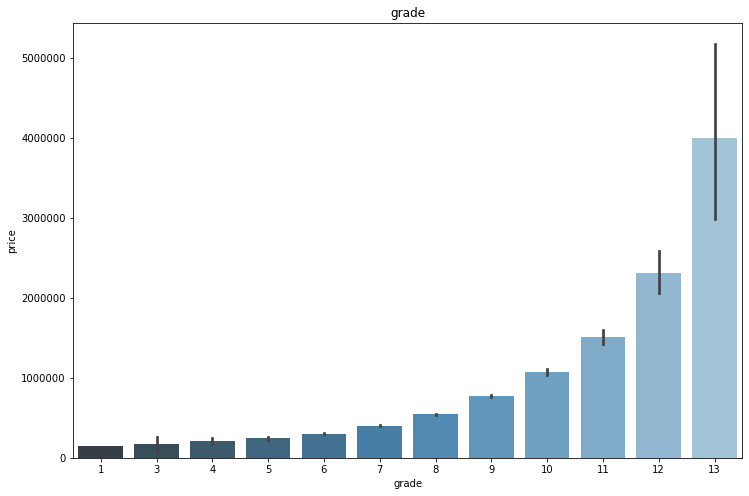

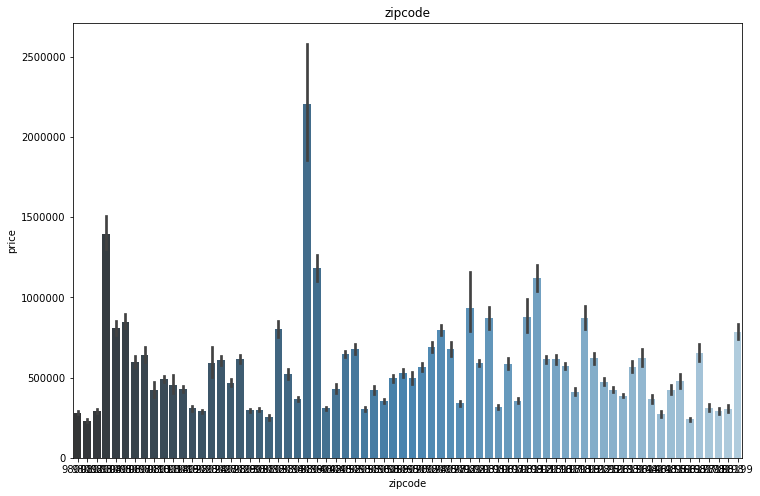

In [20]:
for feature in discrete_feature:
    df = data.copy()
    plt.figure(figsize=(12,8))
    sns.barplot(x=feature, y='price', data=df, palette='Blues_d').set_title(feature)
    

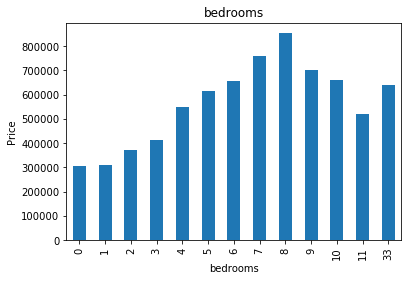

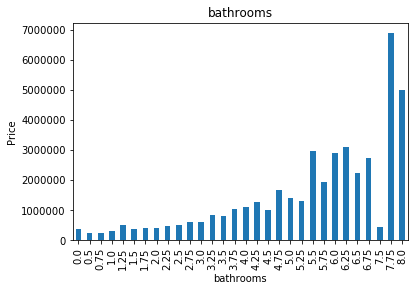

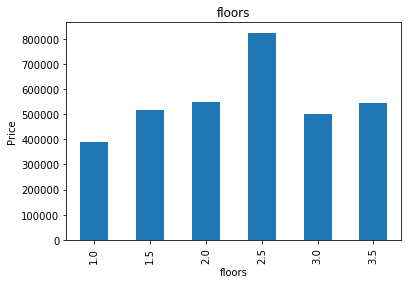

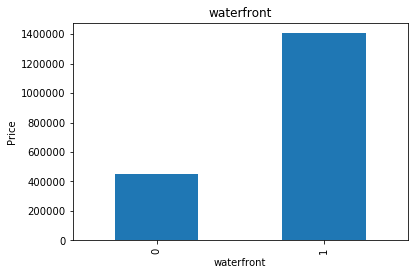

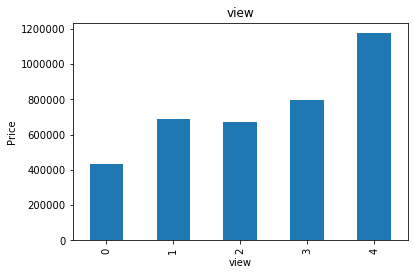

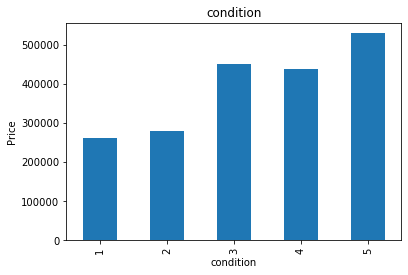

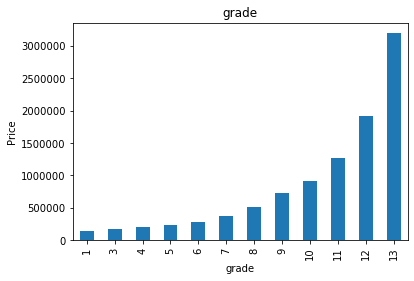

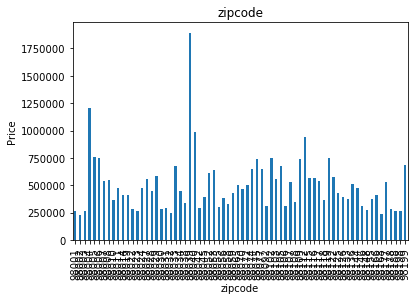

In [21]:
for feature in discrete_feature:
    df = data.copy()
    df.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

In [22]:
len(data['zipcode'].unique())

70

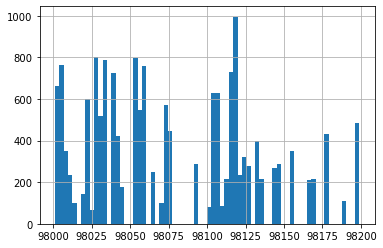

In [23]:
# Broken down by zipcode, we have at most 1000 homes in any zipcode
# and then anywhere between 
data.zipcode.hist(bins=70)

### Geospatial Data

##### https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

In [24]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [25]:
zipcode_map = gpd.read_file('/Users/davidbruce/Downloads/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area-shp/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.shp')

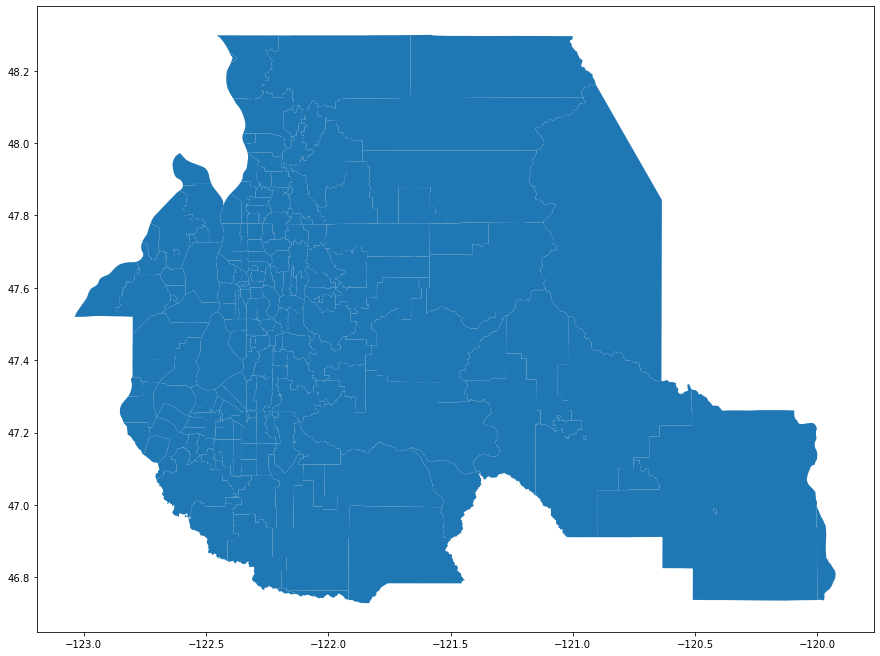

In [26]:
fig,ax = plt.subplots(figsize=(15,15))
zipcode_map.plot(ax = ax)

In [27]:
crs = {'init':'epsg:4326'}

In [28]:
geometry = [Point(xy) for xy in zip(data['long'], df['lat'])]
geometry[:3]

In [29]:
geo_df = gpd.GeoDataFrame(data, crs = crs, geometry = geometry)
geo_df.head()

/Users/davidbruce/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,yr_since_reno,geometry
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,2014,POINT (-122.16200 47.43880)
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,2014,POINT (-122.28500 47.67840)
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014,2014,POINT (-122.12900 47.56460)
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015,2015,POINT (-122.22800 47.69950)
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014,2014,POINT (-122.08300 47.66470)


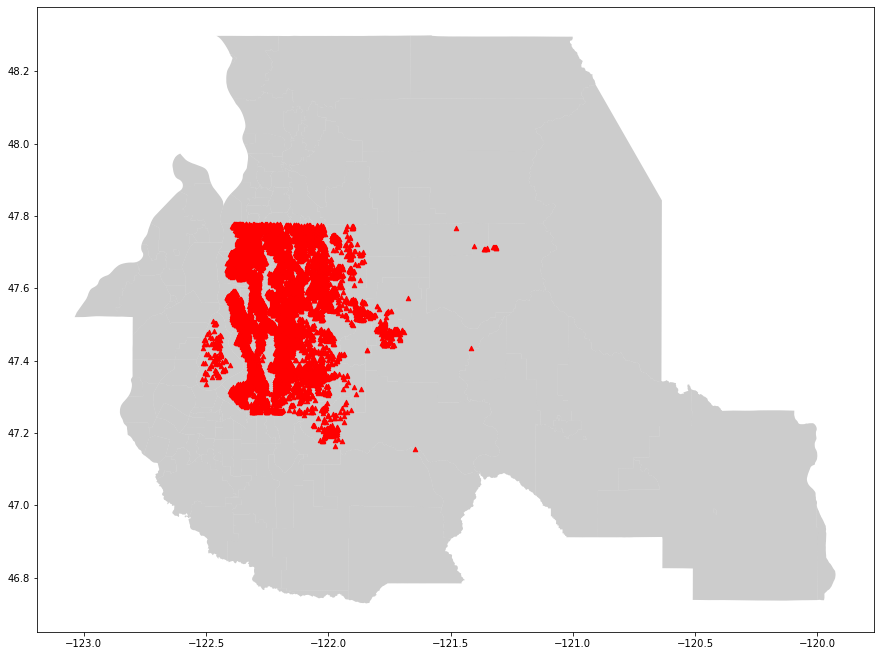

In [30]:
fig,ax = plt.subplots(figsize=(15,15))
zipcode_map.plot(ax = ax, alpha = 0.4, color="grey")
geo_df['geometry'].plot(ax = ax, markersize=20, color='red', marker='^')


In [31]:
spatial_feature = ['long', 'lat']

### Continuous Features

In [32]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature+year_feature+spatial_feature+['id']+['price']]
print('Continuous feature count: {}'.format(len(continuous_feature)))
print(continuous_feature)

Continuous feature count: 6
['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']


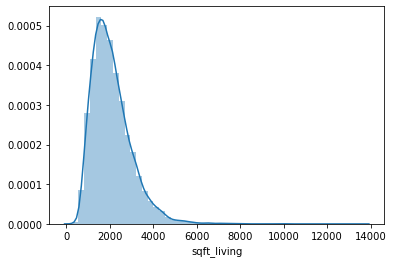

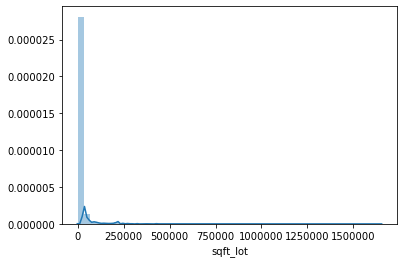

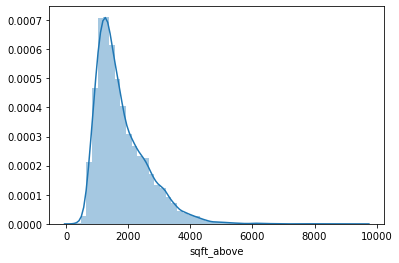

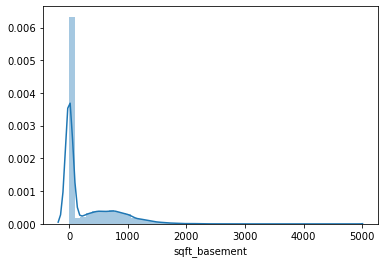

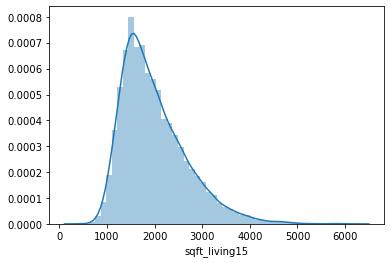

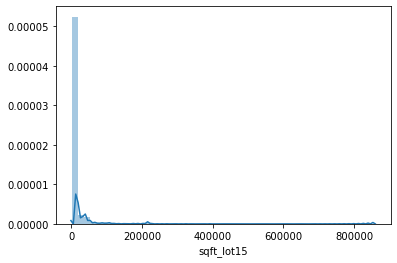

In [33]:
for feature in continuous_feature:
    df = data.copy()
    plt.figure()
    sns.distplot(data[feature])

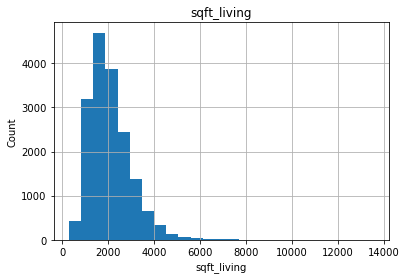

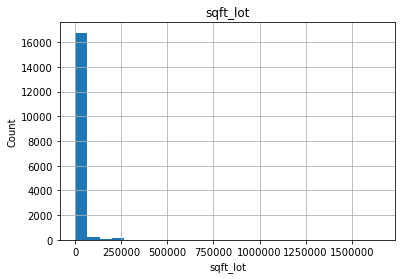

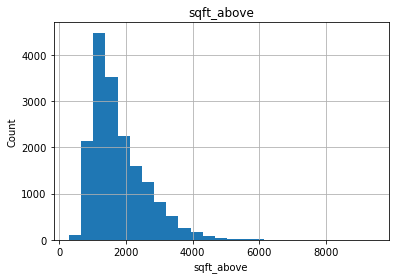

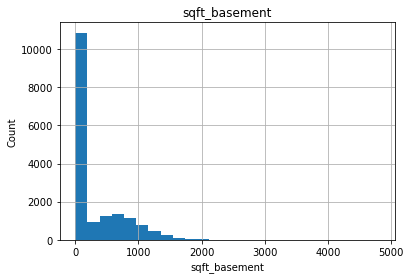

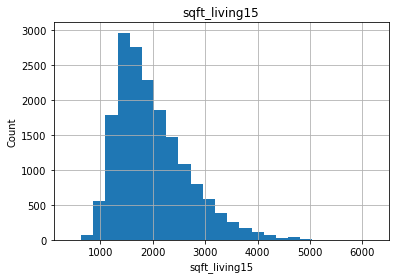

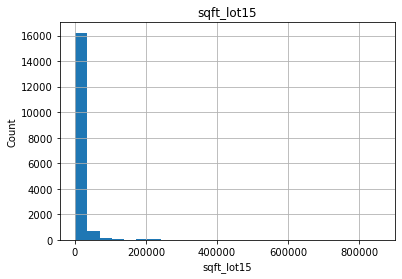

In [34]:
for feature in continuous_feature:
    df = data.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

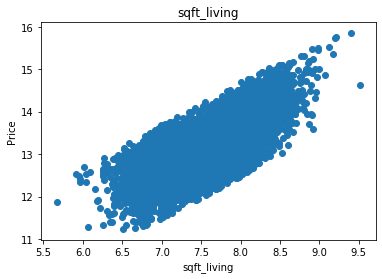

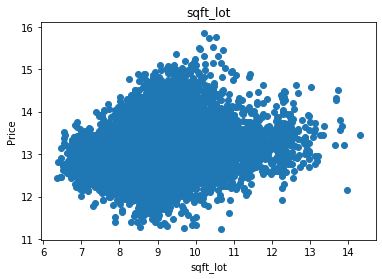

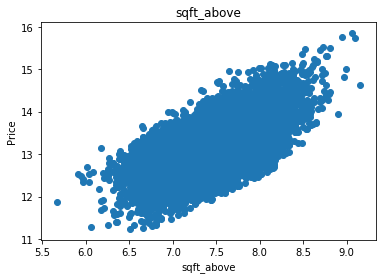

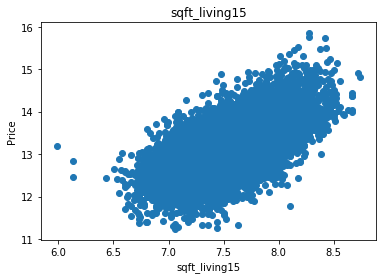

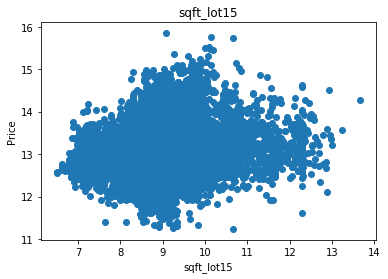

In [35]:
# logarithmic transformation to normal distribution of skewed continuous data

for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df['price']=np.log(df['price'])
        plt.scatter(df[feature], df['price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

## Outliers

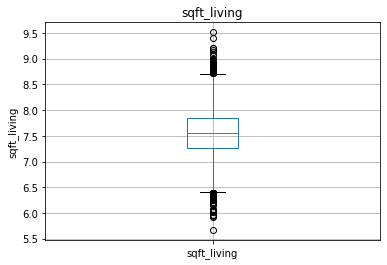

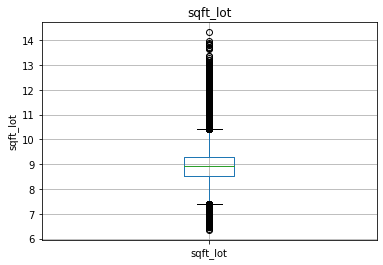

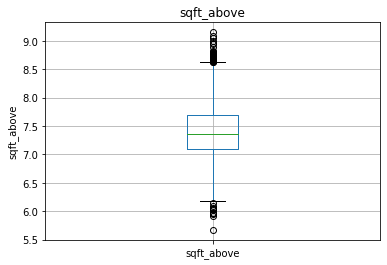

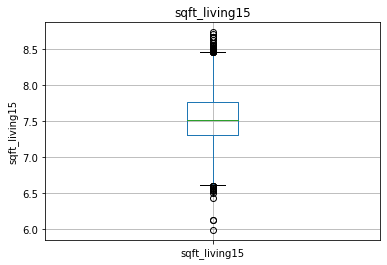

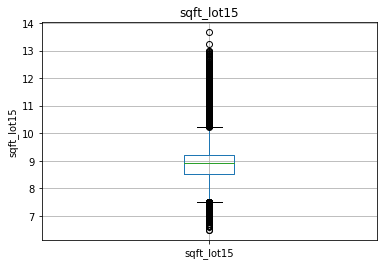

In [36]:
for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

### Correlation Heatmap

I want to do a heatmap of the right variables, not everything

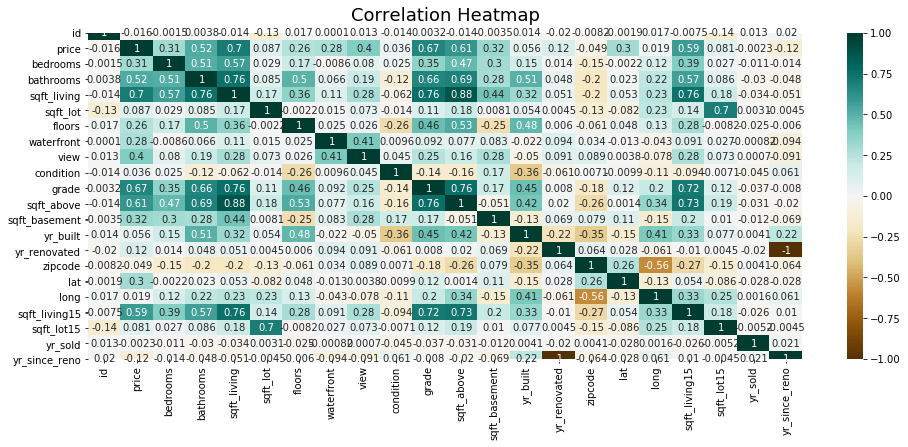

In [37]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Categorical Variables

Figure out how to breakdown sales by month/quarter

In [38]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['date']

In [39]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,yr_since_reno,geometry
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,2014,POINT (-122.16200 47.43880)
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,2014,POINT (-122.28500 47.67840)
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014,2014,POINT (-122.12900 47.56460)
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015,2015,POINT (-122.22800 47.69950)
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014,2014,POINT (-122.08300 47.66470)


In [40]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,yr_since_reno,geometry
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,2015,2015,POINT (-122.11200 47.58580)
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,2014,2014,POINT (-122.28800 47.66870)
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,2014,2014,POINT (-122.26200 47.76350)
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,2014,2014,POINT (-121.99000 47.41990)
17289,6703100135,20150116T000000,348000.0,3,1.50,1330,6768,1.0,0,0,4,7,1330,0,1952,0,98155,47.7366,-122.319,1320,6910,2015,2015,POINT (-122.31900 47.73660)


In [41]:
# added a new column slicing the month from the 'date' column
data['month_sold'] = data['date'].apply(lambda x: int(x[4:6]))
# added 4 new columns using the new 'month_sold' column to make quarterly dummy columns
data['sold_Q1'] = np.where((data['month_sold'] == 1)|(data['month_sold'] == 2)|(data['month_sold'] == 3), 1, 0)
data['sold_Q2'] = np.where((data['month_sold'] == 4)|(data['month_sold'] == 5)|(data['month_sold'] == 6), 1, 0)
data['sold_Q3'] = np.where((data['month_sold'] == 7)|(data['month_sold'] == 8)|(data['month_sold'] == 9), 1, 0)
data['sold_Q4'] = np.where((data['month_sold'] == 10)|(data['month_sold'] == 11)|(data['month_sold'] == 12), 1, 0)

In [42]:
# created barplot comparing average sale prices by quarter
quarters = ['sold_Q1', 'sold_Q2', 'sold_Q3', 'sold_Q4']
quarterly_means = []
for quarter in quarters:
    df = data.loc[data[quarter] == 1]
    quarterly_means.append(round(df['price'].mean(), 2))
quarterly_means

[523757.26, 558913.84, 537906.87, 532702.83]

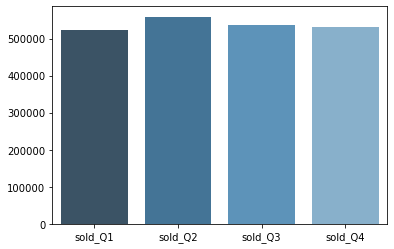

In [43]:
sns.barplot(x=quarters, y=quarterly_means, palette="Blues_d")

In [44]:
months = list(range(1,13))
monthly_means = data.groupby('month_sold').price.mean()

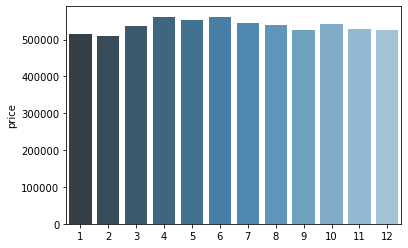

In [45]:
sns.barplot(x=months, y=monthly_means, palette="Blues_d")

In [46]:
# Find out the relationship between categorical variable and dependent feature
# for feature in categorical_features:
#     df = data.copy()
#     df.groupby(feature)['price'].median().plot.bar()
#     plt.xlabel(feature)
#     plt.ylabel('Price')
#     plt.title(feature)
#     plt.show()

# A statsmodel mockup

In [47]:
from statsmodels.formula.api import ols

In [48]:
outcome = 'price'
x_cols = year_feature+discrete_feature+continuous_feature
x_cols.append('month_sold')
x_cols

['yr_built',
 'yr_renovated',
 'yr_sold',
 'yr_since_reno',
 'bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'zipcode',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'month_sold']

In [49]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     1926.
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        04:12:18   Log-Likelihood:            -2.3718e+05
No. Observations:               17290   AIC:                         4.744e+05
Df Residuals:                   17272   BIC:                         4.745e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.078e+07   1.21e+07     -5.008      0.000   -8.46e+07    -3.7e+07
yr_built      -3589.9852     84.681    -42.394      0.000   -3755.969   -3424.001
yr_renovated   1.076e+04   1914.903      5.621      0.000    7010.751    1.45e+04
yr_sold        2.152e+04   3829.712      5.619      0.000     1.4e+04     2.9e+04
yr_since_reno  1.076e+04   1914.805      5.617      0.000    7002.330    1.45e+04
bedrooms       -3.89e+04   2263.316    -17.188      0.000   -4.33e+04   -3.45e+04
bathrooms      4.559e+04   3957.690     11.519      0.000    3.78e+04    5.33e+04
floors         2.536e+04   4355.635      5.821      0.000    1.68e+04    3.39e+04
waterfront     5.908e+05   2.07e+04     28.608      0.000     5.5e+05    6.31e+05
view           4.246e+04   2570.980     16.513      0.000    3.74e+04    4.75e+04
condition      2.136e+04   2858.803      7.472      0.000    1.58e+04     2.7e+04
grade          1.199e+05   2567.170     46.724      0.000    1.15e+05    1.25e+05
zipcode          20.1056     35.530      0.566      0.571     -49.537      89.748
sqft_living     112.0356      2.753     40.693      0.000     106.639     117.432
sqft_lot         -0.0170      0.056     -0.305      0.761      -0.126       0.092
sqft_above       53.5899      2.704     19.820      0.000      48.290      58.890
sqft_basement    58.4383      3.179     18.380      0.000      52.206      64.670
sqft_living15    26.4655      4.149      6.379      0.000      18.334      34.597
sqft_lot15       -0.4953      0.087     -5.674      0.000      -0.666      -0.324
month_sold     1288.3345    860.334      1.497      0.134    -398.008    2974.677
==============================================================================
Omnibus:                    13731.441   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1150542.154
Skew:                           3.238   Prob(JB):                         0.00
Kurtosis:                      42.435   Cond. No.                     5.40e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.01e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
# Canvas lecture "Log Transformations" and Krish Naik Advance House Predictions youtube

In [51]:
for feature in continuous_feature:
    data[feature] = data[feature].map(lambda x: np.log(x))

/Users/davidbruce/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [52]:
continuous_feature

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

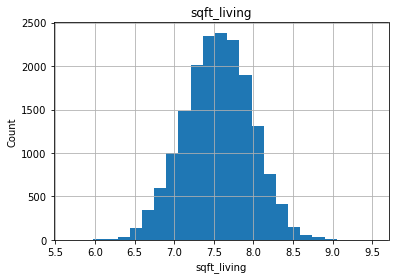

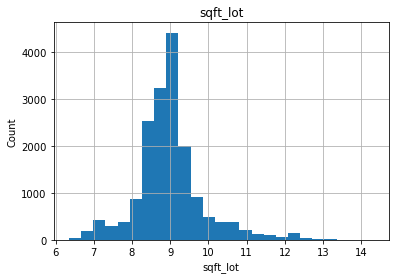

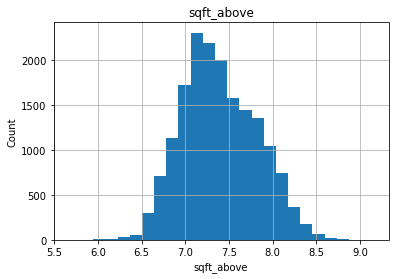

ValueError: supplied range of [-inf, 8.480529207044645] is not finite

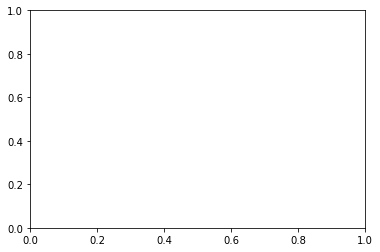

In [53]:
for feature in continuous_feature:
    df = data.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [ ]:
outcome = 'price'
x_cols = year_feature+discrete_feature+continuous_feature
x_cols.append('month_sold')

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()